In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('Popular_Spotify_Songs.csv',encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# **Data Preprocessing Part 1**

In [3]:
# Checking the shape of the dataset
df.shape

(953, 24)

In [4]:
# Checking the data types of the columns
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [5]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['key','bpm','streams'], inplace=True)

In [6]:
# Unique values in the columns
df.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [7]:
# Unqiue artists make
df['artist(s)_name'].unique()

array(['Latto, Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave, Central Cee',
       'Eslabon Armado, Peso Pluma', 'Quevedo', 'Gunna',
       'Peso Pluma, Yng Lvcas', 'Bad Bunny, Grupo Frontera', 'NewJeans',
       'Miley Cyrus', 'David Kushner', 'Harry Styles', 'SZA',
       'Fifty Fifty', 'Billie Eilish', 'Feid, Young Miko', 'Jimin',
       'Gabito Ballesteros, Junior H, Peso Pluma', 'Arctic Monkeys',
       'Bizarrap, Peso Pluma', 'The Weeknd, Madonna, Playboi Carti',
       'Fuerza Regida', 'Rï¿½ï¿½ma, Selena G', 'Tainy, Bad Bunny',
       'Morgan Wallen', 'Dua Lipa', 'Troye Sivan',
       'Peso Pluma, Grupo Frontera',
       'The Weeknd, 21 Savage, Metro Boomin', 'Karol G, Shakira',
       'Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk',
       'Yahritza Y Su Esencia, Grupo Frontera', 'Junior H, Peso Pluma',
       'Post Malone, Swae Lee', 'Bebe Rexha, David Guetta',
       'Tyler, The Creator, Kali Uchis', 'Nic

In [8]:
# Categorizing the number of the artists
def single_or_band(artist_count):
    if artist_count==1:
        return 'Single'
    elif artist_count==2:
        return 'Duet'
    else:
        return 'band'


df['single_or_band'] = df['artist_count'].apply(single_or_band)

In [9]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [10]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,in_shazam_charts,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,single_or_band
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,43,263,...,826,Major,80,89,83,31,0,8,4,Duet
1,LALA,Myke Towers,1,2023,3,23,1474,48,48,126,...,382,Major,71,61,74,7,0,10,4,Single
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,94,207,...,949,Major,51,32,53,17,0,31,6,Single
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,116,207,...,548,Major,55,58,72,11,0,11,15,Single
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,84,133,...,425,Minor,65,23,80,14,63,11,6,Single


Remove rows with missing values

In [11]:
df = df.dropna()


Clean column names by removing special characters and converting to lowercase

In [22]:
df.columns = df.columns.str.replace('"', '')
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('##', '')
df.columns = df.columns.str.lower()

# **Exploratory Data Analysis**

Single, Duet, Band Songs

<ipython-input-26-d3641fc1b1fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['single_or_band'].value_counts().index, y=df['single_or_band'].value_counts(), palette=palette)


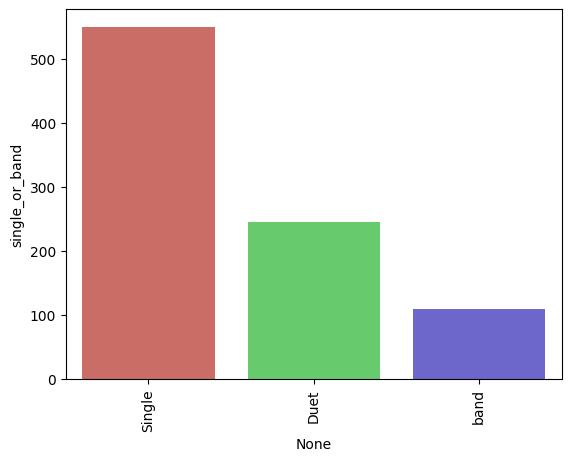

In [26]:
palette = sns.color_palette("hls", len(df['single_or_band'].unique()))

sns.barplot(x=df['single_or_band'].value_counts().index, y=df['single_or_band'].value_counts(), palette=palette)
plt.xticks(rotation=90)
plt.show()

In the dataset, most of the songs are single (particulary majority of the are single). However the dataset also has Duet as well Band songs.

# ***Year and Number of Songs***

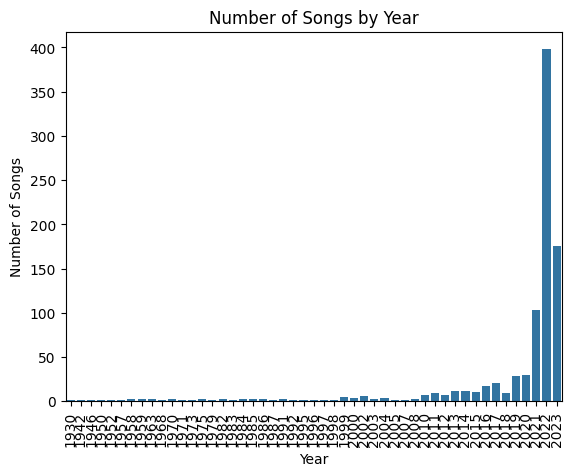

In [29]:
# Assuming df is your DataFrame and 'year' is the column representing the year each song was released
sns.countplot(x='released_year', data=df)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Year')
plt.show()

# Number of songs by Mode

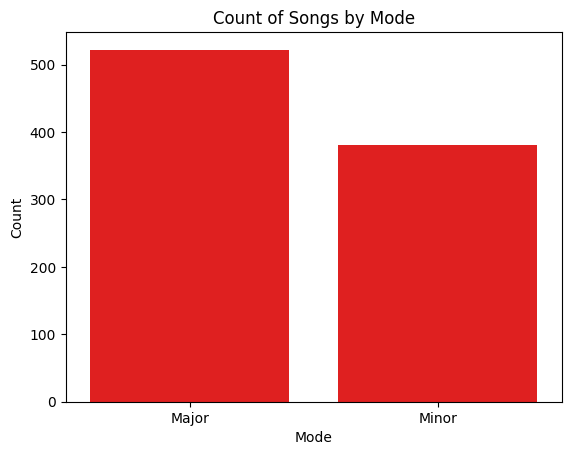

In [38]:
sns.barplot(x=df['mode'].value_counts().index, y=df['mode'].value_counts(),color='red')
plt.xticks(rotation=0)
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Count of Songs by Mode')
plt.show()

# Energy and Year

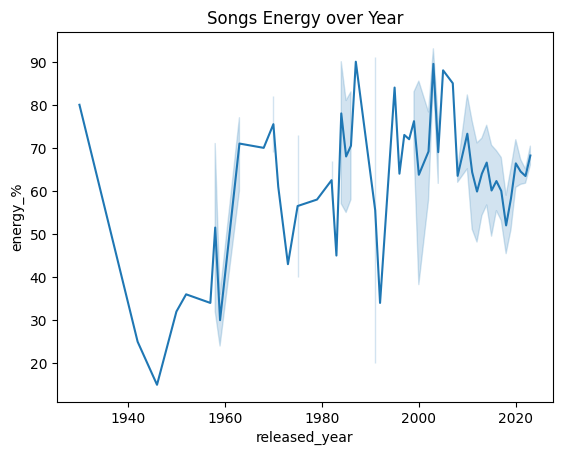

In [48]:
sns.lineplot(x='released_year', y='energy_%', data=df)
plt.title('Songs Energy over Year')
plt.show()

Songs' energy decreased in 1940ths due to Second World War.

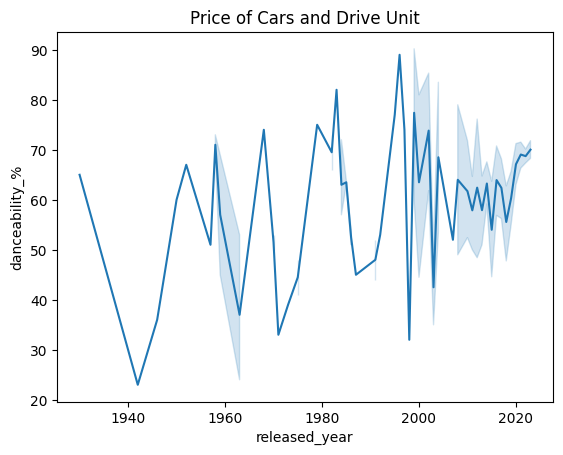

In [51]:
sns.lineplot(x = 'released_year', y = 'danceability_%', data = df)
plt.title('Danceability of Songs over Years')
plt.show()

# Data Preprocessing Part 2

In [52]:
 # checking for null values
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
single_or_band          0
dtype: int64

In [55]:
def transform_column_name(column_name):
    words = column_name.split('_')
    words = [word.capitalize() for word in words]
    return ' '.join(words)

# Rename columns
df.columns = [transform_column_name(column) for column in df.columns]

# Write the DataFrame back to a new CSV file
df.to_csv('new_file.csv', index=False)